# EP2: วิเคราะห์กราฟข้อมูลด้วย Pandas

# Import Library

In [1]:
import pandas as pd
import numpy as np
import seaborn as sns # pip install seaborn
import matplotlib.pyplot as plt
import warnings
warnings.filterwarnings("ignore")

# อ่านข้อมูล และ เช็คข้อมูลเบื้องต้น

In [2]:
# แหล่งที่มาของ Dataset: https://www.kaggle.com/datasets/burak3ergun/loan-data-set
df = pd.read_csv('./loan_dataset.csv')
print(df.isnull().sum())  # แสดงจำนวนค่า missing ในแต่ละ column
missing_rows = df[df.isnull().any(axis=1)] # เช็คในแต่ละ column ว่ามีค่า missing หรือไม่
missing_gender = df[df['Gender'].isnull()] # เช็คใน column นั้นๆว่ามีค่า missing หรือไม่
display(missing_rows) # แสดงแถวที่มีค่า missing
display(missing_gender)

Loan_ID               0
Gender               13
Married               3
Dependents           15
Education             0
Self_Employed        32
ApplicantIncome       0
CoapplicantIncome     0
LoanAmount           22
Loan_Amount_Term     14
Credit_History       50
Property_Area         0
Loan_Status           0
dtype: int64


,Loan_ID,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area,Loan_Status
0,LP001002,Male,No,0,Graduate,No,5849,0.0,NaN,360.0,1.0,Urban,Y
11,LP001027,Male,Yes,2,Graduate,NaN,2500,1840.0,109.0,360.0,1.0,Urban,Y
16,LP001034,Male,No,1,Not Graduate,No,3596,0.0,100.0,240.0,NaN,Urban,Y
19,LP001041,Male,Yes,0,Graduate,NaN,2600,3500.0,115.0,NaN,1.0,Urban,Y
23,LP001050,NaN,Yes,2,Not Graduate,No,3365,1917.0,112.0,360.0,0.0,Rural,N
...,...,...,...,...,...,...,...,...,...,...,...,...,...
592,LP002933,NaN,No,3+,Graduate,Yes,9357,0.0,292.0,360.0,1.0,Semiurban,Y
597,LP002943,Male,No,NaN,Graduate,No,2987,0.0,88.0,360.0,0.0,Semiurban,N
600,LP002949,Female,No,3+,Graduate,NaN,416,41667.0,350.0,180.0,NaN,Urban,N
601,LP002950,Male,Yes,0,Not Graduate,NaN,2894,2792.0,155.0,360.0,1.0,Rural,Y


,Loan_ID,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area,Loan_Status
23,LP001050,NaN,Yes,2,Not Graduate,No,3365,1917.0,112.0,360.0,0.0,Rural,N
126,LP001448,NaN,Yes,3+,Graduate,No,23803,0.0,370.0,360.0,1.0,Rural,Y
171,LP001585,NaN,Yes,3+,Graduate,No,51763,0.0,700.0,300.0,1.0,Urban,Y
188,LP001644,NaN,Yes,0,Graduate,Yes,674,5296.0,168.0,360.0,1.0,Rural,Y
314,LP002024,NaN,Yes,0,Graduate,No,2473,1843.0,159.0,360.0,1.0,Rural,N
334,LP002103,NaN,Yes,1,Graduate,Yes,9833,1833.0,182.0,180.0,1.0,Urban,Y
460,LP002478,NaN,Yes,0,Graduate,Yes,2083,4083.0,160.0,360.0,NaN,Semiurban,Y
467,LP002501,NaN,Yes,0,Graduate,No,16692,0.0,110.0,360.0,1.0,Semiurban,Y
477,LP002530,NaN,Yes,2,Graduate,No,2873,1872.0,132.0,360.0,0.0,Semiurban,N
507,LP002625,NaN,No,0,Graduate,No,3583,0.0,96.0,360.0,1.0,Urban,N


## วิธีรับมือกับข้อมูลที่หาย (Nan value)
- ลบ `df.dropna()`, `df.dropna(axis=1, thresh=min_required_non_null)`
- ใส่ข้อมูลเข้าไป Mean/Median/Mode, Interpolation/K-nearest Neighbors(KNN), เติมข้อมูลที่เจอบ่อยๆเข้าไป, ใส่เป็น placeholder
- อื่นๆ....

ส่วนมากต้องการความเข้าใจในข้อมูลและความเชี่ยวชาญในการเลือกวิธีการรับมือกับข้อมูลที่หายไป

| สถานการณ์                                  | คำแนะนำ                                                     |
| ------------------------------------------ | ----------------------------------------------------------- |
| **มีค่าที่ขาดหายไปเพียงเล็กน้อย**          | ลบแถวนั้นออกไป                                              |
| **มีค่าที่ขาดหายไปจำนวนมากในฟีเจอร์สำคัญ** | เติมด้วย `'Unknown'` หรือค่าพิเศษอื่น ๆ                     |
| **คอลัมน์ตัวเลขที่มีค่าขาดหาย**            | เติมด้วยค่าเฉลี่ย (mean), มัธยฐาน (median) หรือใช้โมเดลช่วย |
| **ฟีเจอร์ประเภทหมวดหมู่ (Categorical)**    | เติมด้วยโหมด (mode) หรือ `'Unknown'`                        |
| **เตรียมข้อมูลสำหรับ Machine Learning**    | มักจะควรเข้ารหัสค่าที่ขาดหายไว้อย่างชัดเจน                  |


### Inplace vs Return

In [3]:
df_inplace = pd.DataFrame({'A': [1, 2, None, 4]})
df_inplace.dropna(inplace=True) # แก้ไข df โดยลบแถวที่มีค่า NaN และเปลี่ยนแปลง df
print(df_inplace)  

df_inplace = pd.DataFrame({'A': [1, 2, None, 4]})
df_inplace_2 = df_inplace.dropna(inplace=False) # แก้ไข df2 โดยลบแถวที่มีค่า NaN แต่ไม่เปลี่ยนแปลง df
print(df_inplace)
print(df_inplace_2)  

     A
0  1.0
1  2.0
3  4.0
     A
0  1.0
1  2.0
2  NaN
3  4.0
     A
0  1.0
1  2.0
3  4.0


In [4]:
# ลบแถวที่มีค่า Nan
df = df.dropna(subset=['Gender', 'Married', 'Education', 'Self_Employed'])  # ลบแถวที่มีค่า missing ใน column

# ใส่ค่า mean หรือ median แทนค่า Nan
# df['LoanAmount'].fillna(df['LoanAmount'].mean(), inplace=True)
# df['LoanAmount'].fillna(df['LoanAmount'].median(), inplace=True)
df['LoanAmount'] = df.groupby(['Education', 'Self_Employed'])['LoanAmount'].transform(lambda x: x.fillna(x.median()))
df['Loan_Amount_Term'].fillna(df['Loan_Amount_Term'].mode()[0], inplace=True)

# แทนค่า Dependents ที่เป็น '3+' ด้วย 3 และแปลงเป็นตัวเลข
df['Dependents'] = df['Dependents'].replace('3+', 3)
df['Dependents'] = pd.to_numeric(df['Dependents'], errors='coerce')  # force NaN on invalid
# df['Dependents'] = df.groupby(['Gender', 'Married', 'Education'])['Dependents'].transform(lambda x: x.fillna(x.mode()))
df['Dependents'] = df.groupby(['Gender', 'Married', 'Education'])['Dependents'].transform(lambda x: x.fillna(x.mode().iloc[0] if not x.mode().empty else x.median()))

# Credit History มีค่า missing เยอะ เลยแทนด้วย -1
df['Credit_History'].fillna(-1, inplace=True)

# สร้าง column ใหม่ที่เป็นการรวมข้อมูลจากหลายๆ column
df['TotalIncome'] = df['ApplicantIncome'] + df['CoapplicantIncome']

print(df.isnull().sum())  # แสดงจำนวนค่า missing ในแต่ละ column
display(df)



Loan_ID              0
Gender               0
Married              0
Dependents           0
Education            0
Self_Employed        0
ApplicantIncome      0
CoapplicantIncome    0
LoanAmount           0
Loan_Amount_Term     0
Credit_History       0
Property_Area        0
Loan_Status          0
TotalIncome          0
dtype: int64


,Loan_ID,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area,Loan_Status,TotalIncome
0,LP001002,Male,No,0.0,Graduate,No,5849,0.0,130.0,360.0,1.0,Urban,Y,5849.0
1,LP001003,Male,Yes,1.0,Graduate,No,4583,1508.0,128.0,360.0,1.0,Rural,N,6091.0
2,LP001005,Male,Yes,0.0,Graduate,Yes,3000,0.0,66.0,360.0,1.0,Urban,Y,3000.0
3,LP001006,Male,Yes,0.0,Not Graduate,No,2583,2358.0,120.0,360.0,1.0,Urban,Y,4941.0
4,LP001008,Male,No,0.0,Graduate,No,6000,0.0,141.0,360.0,1.0,Urban,Y,6000.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
609,LP002978,Female,No,0.0,Graduate,No,2900,0.0,71.0,360.0,1.0,Rural,Y,2900.0
610,LP002979,Male,Yes,3.0,Graduate,No,4106,0.0,40.0,180.0,1.0,Rural,Y,4106.0
611,LP002983,Male,Yes,1.0,Graduate,No,8072,240.0,253.0,360.0,1.0,Urban,Y,8312.0
612,LP002984,Male,Yes,2.0,Graduate,No,7583,0.0,187.0,360.0,1.0,Urban,Y,7583.0


# วาดกราฟด้วย Matplotlib

## กราฟแท่ง (จัดการข้อมูลเอง)

Loan_Status    N    Y
Gender               
Female        35   68
Male         143  320
[0 1]
[-0.175  0.825]
[0.175 1.175]


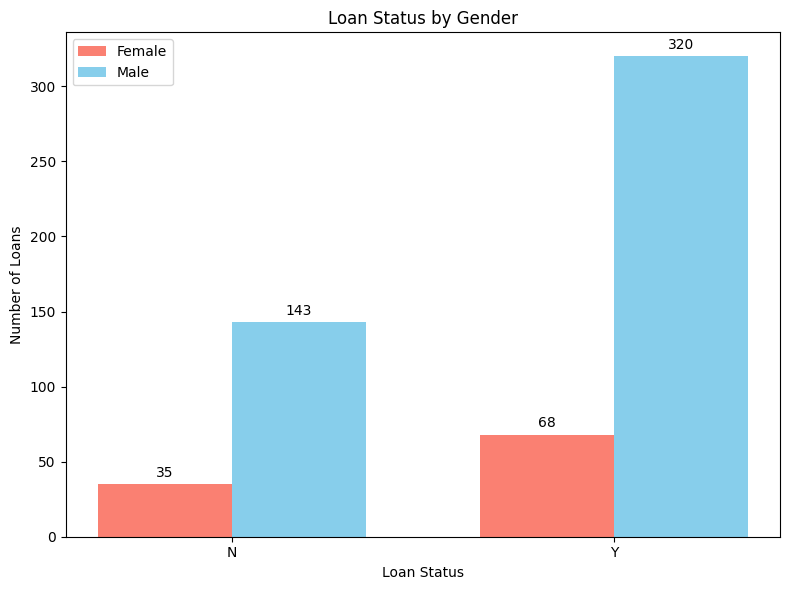

In [5]:
loan_by_gender = pd.crosstab(df['Gender'], df['Loan_Status'])
print(loan_by_gender)

labels = loan_by_gender.columns.tolist()  # ['N', 'Y']
x = np.arange(len(labels))
female = loan_by_gender.loc['Female'].tolist()
male = loan_by_gender.loc['Male'].tolist()

# print(female)
# print(male)

width = 0.35  # ความกว้างของกราฟแต่ละแท่ง
print(x)
print(x - width/2)
print(x + width/2)

fig, ax = plt.subplots(figsize=(8, 6))
rects1 = ax.bar(x - width/2, female, width, label='Female', color='salmon')
rects2 = ax.bar(x + width/2, male, width, label='Male', color='skyblue')

# ตั้งค่ารูปแบบกราฟ
ax.set_xlabel('Loan Status')
ax.set_ylabel('Number of Loans')
ax.set_title('Loan Status by Gender')
ax.set_xticks(x)
ax.set_xticklabels(labels)
ax.legend()

# เพิ่มค่า annotation บนแท่งกราฟ
for rects in [rects1, rects2]:
    for rect in rects:
        height = rect.get_height()
        ax.annotate(f'{int(height)}',
                    xy=(rect.get_x() + rect.get_width()/2, height),
                    xytext=(0, 3),  # 3 points vertical offset
                    textcoords="offset points",
                    ha='center', va='bottom')

plt.tight_layout()
plt.savefig('fig1.png')
plt.show()

## กราฟแท่ง (ใช้ function)

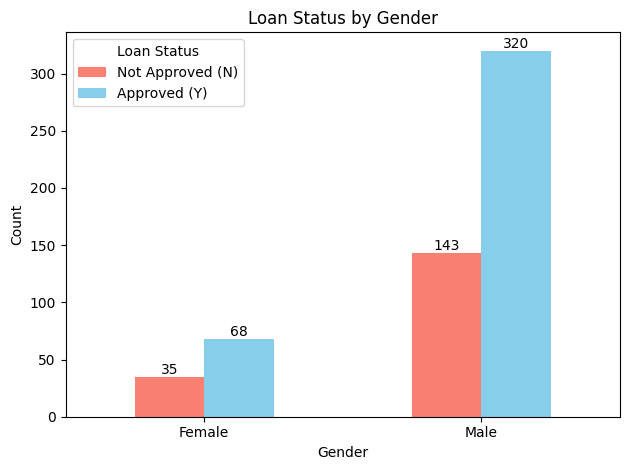

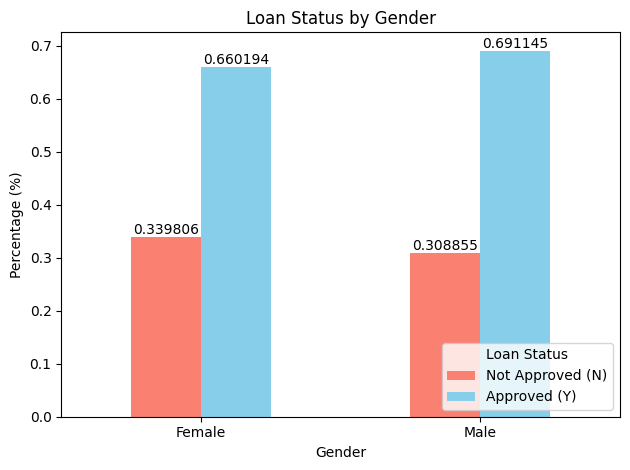

<class 'matplotlib.container.BarContainer'>
35
143
<class 'matplotlib.container.BarContainer'>
68
320


In [6]:
# Plot 1 : Loan Status กับ Gender (นับจำนวน)
ax1 = loan_by_gender.plot(kind='bar', stacked=False, color=['salmon', 'skyblue'])
plt.title('Loan Status by Gender')
plt.xlabel('Gender')
plt.ylabel('Count')
plt.xticks(rotation=0)
plt.legend(title='Loan Status', labels=['Not Approved (N)', 'Approved (Y)'])
plt.tight_layout()
# แสดงค่าบนแท่งกราฟ
for container in ax1.containers:
    ax1.bar_label(container)


# Plot 2 : Loan Status กับ Gender (เป็นเปอร์เซ็นต์)
loan_by_gender_2 = pd.crosstab(df['Gender'], df['Loan_Status'], normalize='index')
ax2 = loan_by_gender_2.plot(kind='bar', stacked=False, color=['salmon', 'skyblue'])
plt.title('Loan Status by Gender')
plt.xlabel('Gender')
plt.ylabel('Percentage (%)')
plt.xticks(rotation=0)
plt.legend(title='Loan Status', labels=['Not Approved (N)', 'Approved (Y)'], loc='lower right')
plt.tight_layout()
# แสดงค่าบนแท่งกราฟ
for container in ax2.containers:
    ax2.bar_label(container)

plt.savefig('fig2.png')
plt.show()

for container in ax1.containers:
    print(type(container))  # matplotlib.container.BarContainer
    for bar in container:
        print(bar.get_height())  # ความสูงของแท่งกราฟ

1442.0
81000.0
[ 1442.  17353.6 33265.2 49176.8 65088.4 81000. ]
['1442-17353', '17353-33265', '33265-49176', '49176-65088', '65088-81000']
TotalIncome_bin
1442-17353     546
17353-33265     14
33265-49176      5
49176-65088      0
65088-81000      1
Name: count, dtype: int64


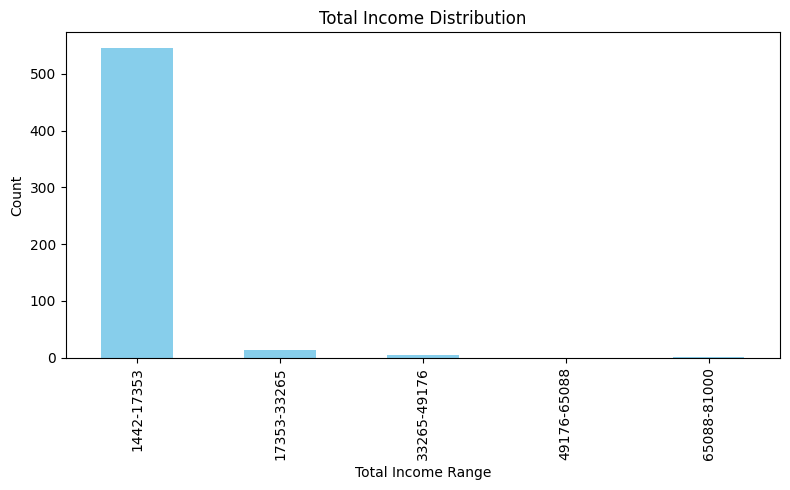

In [7]:
# หาค่า min and max (ไม่รวม NaN)
loan_min = df['TotalIncome'].min()
loan_max = df['TotalIncome'].max()

print(loan_min)
print(loan_max)

# สร้าง 5 bins สำหรับการแบ่งช่วงของ TotalIncome
num_bins = 5
bins = np.linspace(loan_min, loan_max, num_bins + 1)
print(bins)

# สร้าง labels สำหรับ bins
labels = [f'{int(bins[i])}-{int(bins[i+1])}' for i in range(num_bins)]
print(labels)
# จัดกลุ่มข้อมูล TotalIncome ตาม bins ที่กำหนด
df['TotalIncome_bin'] = pd.cut(df['TotalIncome'], bins=bins, labels=labels, include_lowest=True)
print(df['TotalIncome_bin'].value_counts(sort=False))

# Plot กราฟแท่งแสดงการกระจายของ Total Income
plt.figure(figsize=(8, 5))
df['TotalIncome_bin'].value_counts(sort=False).plot(kind='bar', color='skyblue')
plt.xlabel('Total Income Range')
plt.ylabel('Count')
plt.title('Total Income Distribution')
plt.tight_layout()
plt.savefig('fig3.png')
plt.show()

## กราฟเส้น

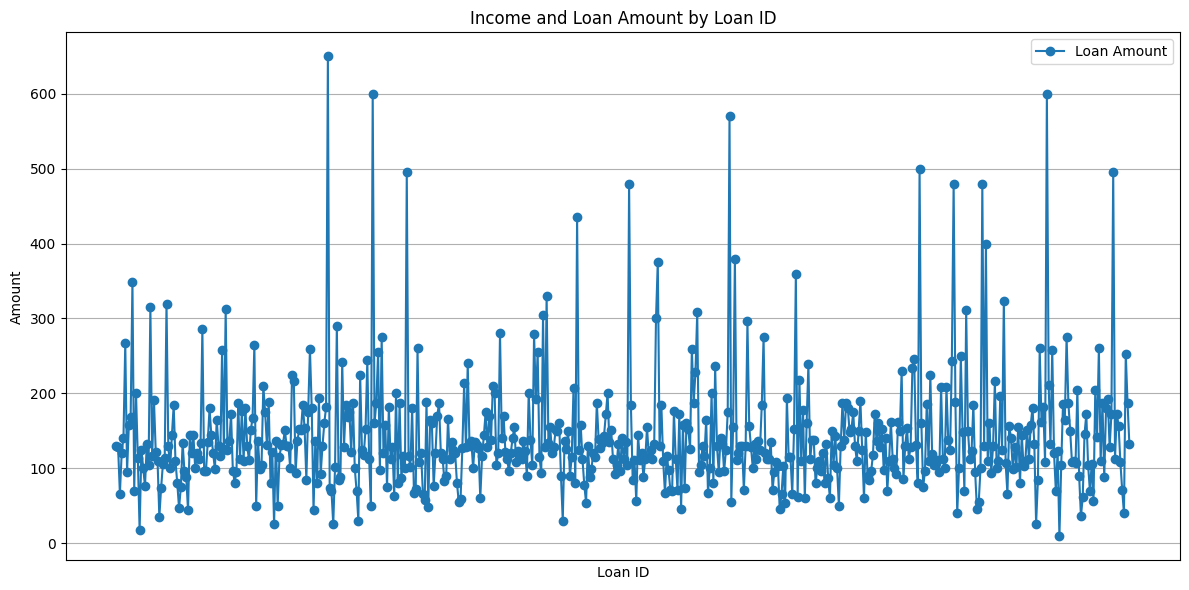

In [8]:
fig, ax = plt.subplots(figsize=(12, 6))
ax.plot(df['Loan_ID'], df['LoanAmount'], label='Loan Amount', marker='o')

plt.xticks(rotation=0)
plt.title('Income and Loan Amount by Loan ID')
plt.xlabel('Loan ID')
plt.ylabel('Amount')
plt.xticks([])
plt.legend()
plt.tight_layout()
plt.grid(True)
plt.savefig('fig4.png')
plt.show()

## กราฟตางราง (จัดการข้อมูลเอง)

In [9]:
group_counts = []
# จัดการข้อมุล
for group, data in df.groupby(['Gender', 'Married', 'Education', 'Dependents'])['Dependents']:
    # print(group)
    count = data.shape[0]
    group_counts.append({
        'Gender': group[0],
        'Married': group[1],
        'Education': group[2],
        'Dependents': group[3],
        'Count': count
    })

# ใช้ DataFrame เพื่อสร้าง summary table
summary_df = pd.DataFrame(group_counts)
display(summary_df)

,Gender,Married,Education,Dependents,Count
0,Female,No,Graduate,0.0,50
1,Female,No,Graduate,1.0,9
2,Female,No,Graduate,2.0,1
3,Female,No,Graduate,3.0,1
4,Female,No,Not Graduate,0.0,10
5,Female,No,Not Graduate,1.0,2
6,Female,No,Not Graduate,3.0,1
7,Female,Yes,Graduate,0.0,14
8,Female,Yes,Graduate,1.0,6
9,Female,Yes,Graduate,2.0,4


(8, 4)


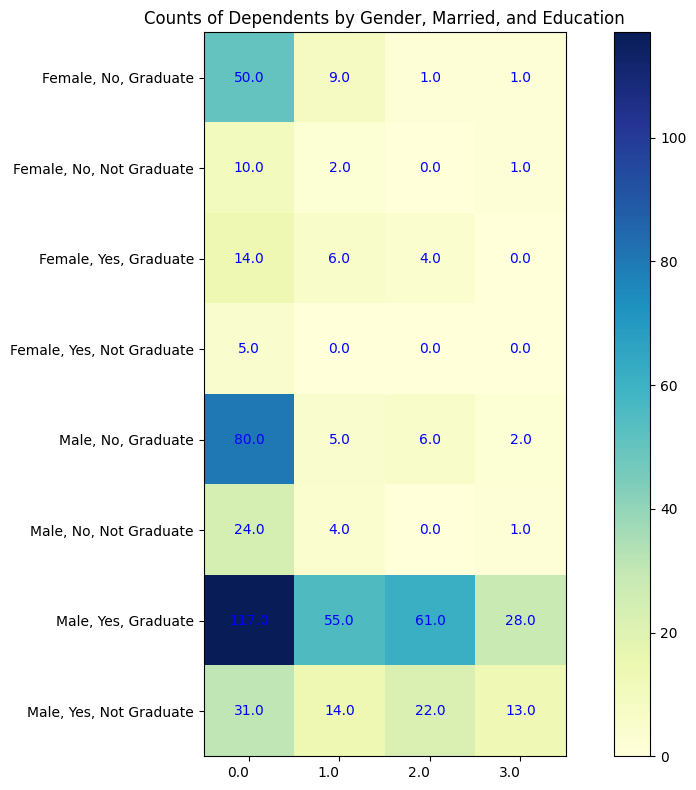

In [10]:
pivot = summary_df.pivot_table(
    index=['Gender', 'Married', 'Education'],
    columns='Dependents',
    values='Count',
    fill_value=0
)

data = pivot.values # ค่าแกน z
row_labels = [f"{g}, {m}, {e}" for g, m, e in pivot.index] # หัวข้อแกน y
col_labels = pivot.columns.astype(str) # หัวข้อแกน x

fig, ax = plt.subplots(figsize=(10, 8))
cmap = plt.cm.YlGnBu
heatmap = ax.imshow(data, cmap=cmap)
print(data.shape)
for i in range(data.shape[0]):
    for j in range(data.shape[1]):
        ax.text(j, i, str(data[i, j]), ha='center', va='center', color='blue')

ax.set_xticks(np.arange(len(col_labels)))
ax.set_xticklabels(col_labels)
ax.set_yticks(np.arange(len(row_labels)))
ax.set_yticklabels(row_labels)
plt.xticks(rotation=0, ha='right')
plt.title("Counts of Dependents by Gender, Married, and Education")
plt.colorbar(heatmap, ax=ax)
plt.tight_layout()
plt.savefig('fig6_matplotlib.png')
plt.show()


## กราฟตางราง (ใช้ function crosstab)

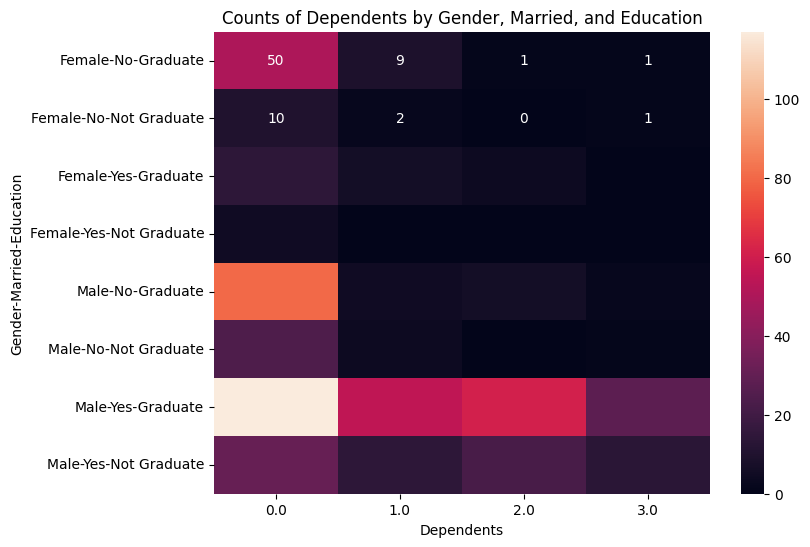

In [ ]:
pivot = summary_df.pivot_table(
    index=['Gender', 'Married', 'Education'],
    columns='Dependents',
    values='Count',
    fill_value=0
)

# Optinal: แสดงข้อมูลในรูปแบบ Heatmap ด้วย Seaborn
plt.figure(figsize=(8, 6))
sns.heatmap(pivot, annot=True)
plt.title("Counts of Dependents by Gender, Married, and Education")
plt.savefig('fig6_seaborn.png')
plt.show()

# แบบฝึกหัด

1. Plot กราฟแท่งกับ bin ด้วย 'ApplicantIncome' 
2. Plot กราฟเส้นด้วย Loan_ID ในแกน x และ TotalIncome แกน y